# CNN Skin Cancer Assignment
#### Performed by Rohit Lal

Problem statement: To build a CNN based model which can accurately detect melanoma. Melanoma is a type of cancer that can be deadly if not detected early. It accounts for 75% of skin cancer deaths. A solution which can evaluate images and alert the dermatologists about the presence of melanoma has the potential to reduce a lot of manual effort needed in diagnosis.

### Importing Skin Cancer Data
#### To do: Take necessary actions to read the data

### Importing all the important libraries

In [1]:
import pathlib
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import PIL
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from glob import glob

In [2]:
tf.__version__

'2.3.0'

In [3]:
# import zipfile
# zip_ref = zipfile.ZipFile("/content/gdrive/My Drive/Colab Notebooks/UpGrad Assignment/Dataset/CNN_assignment.zip", 'r')
# zip_ref.extractall("/content/gdrive/My Drive/Colab Notebooks/UpGrad Assignment/Dataset/CNN_assignment/")
# zip_ref.close()

In [4]:
## If you are using the data by mounting the google drive, use the following :
# from google.colab import drive
# drive.mount('/content/gdrive')

##Ref:https://towardsdatascience.com/downloading-datasets-into-google-drive-via-google-colab-bcb1b30b0166

This assignment uses a dataset of about 2357 images of skin cancer types. The dataset contains 9 sub-directories in each train and test subdirectories. The 9 sub-directories contains the images of 9 skin cancer types respectively.

In [5]:
# Defining the path for train and test images
## Todo: Update the paths of the train and test dataset
data_dir_train = pathlib.Path("Dataset/Train")
data_dir_test = pathlib.Path('Dataset/Test')

In [6]:
image_count_train = len(list(data_dir_train.glob('*/*.jpg')))
print(image_count_train)
image_count_test = len(list(data_dir_test.glob('*/*.jpg')))
print(image_count_test)

2239
118


### Load using keras.preprocessing

Let's load these images off disk using the helpful image_dataset_from_directory utility.

### Create a dataset

Define some parameters for the loader:

In [7]:
batch_size = 32
img_height = 180
img_width = 180
input_shape = (img_height, img_width)

Use 80% of the images for training, and 20% for validation.

In [8]:
## Write your train dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
train_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, batch_size=batch_size, validation_split=0.2, 
    subset='training', image_size=input_shape)

Found 2239 files belonging to 9 classes.
Using 1792 files for training.


In [9]:
## Write your validation dataset here
## Note use seed=123 while creating your dataset using tf.keras.preprocessing.image_dataset_from_directory
## Note, make sure your resize your images to the size img_height*img_width, while writting the dataset
val_ds = keras.preprocessing.image_dataset_from_directory(
    data_dir_train, seed=123, batch_size=batch_size, validation_split=0.2,
    subset='validation', image_size=(img_height, img_width))

Found 2239 files belonging to 9 classes.
Using 447 files for validation.


In [10]:
# List out all the classes of skin cancer and store them in a list. 
# You can find the class names in the class_names attribute on these datasets. 
# These correspond to the directory names in alphabetical order.
class_names = train_ds.class_names
print(class_names)

['actinic keratosis', 'basal cell carcinoma', 'dermatofibroma', 'melanoma', 'nevus', 'pigmented benign keratosis', 'seborrheic keratosis', 'squamous cell carcinoma', 'vascular lesion']


### Visualize the data
#### Todo, create a code to visualize one instance of all the nine classes present in the dataset

In [11]:
len(class_names)

9

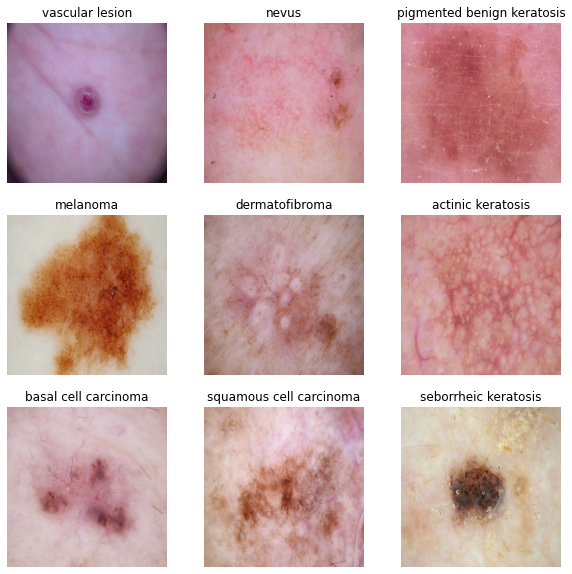

In [12]:
import matplotlib.pyplot as plt

plotted = []
plot_num = 1

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(5):
  # print(labels)
  for i in range(32):
      if class_names[labels[i]] not in plotted:
        ax = plt.subplot(3, 3, plot_num)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(class_names[labels[i]])
        plt.axis("off")

        plotted.append(class_names[labels[i]])
        plot_num += 1 

In [13]:
for image_batch, labels_batch in train_ds:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

(32, 180, 180, 3)
(32,)


The `image_batch` is a tensor of the shape `(32, 180, 180, 3)`. This is a batch of 32 images of shape `180x180x3` (the last dimension refers to color channels RGB). The `label_batch` is a tensor of the shape `(32,)`, these are corresponding labels to the 32 images.

`Dataset.cache()` keeps the images in memory after they're loaded off disk during the first epoch.

`Dataset.prefetch()` overlaps data preprocessing and model execution while training.

In [14]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

### Create the model
#### Todo: Create a CNN model, which can accurately detect 9 classes present in the dataset. Use ```layers.experimental.preprocessing.Rescaling``` to normalize pixel values between (0,1). The RGB channel values are in the `[0, 255]` range. This is not ideal for a neural network. Here, it is good to standardize values to be in the `[0, 1]`

In [ ]:
num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compile the model
Choose an appropirate optimiser and loss function for model training 

In [ ]:
### Todo, choose an appropirate optimiser and loss function
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
# View the summary of all layers
# model.summary()

### Train the model

In [ ]:
epochs = 20
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

### Visualizing training results

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit

### Findings:

We can see that the `training accuracy` is very high, but the `validation accuracy` is pretty low.


This shows the model has `overfitted` the data. 

In [15]:
# Todo, after you have analysed the model fit history for presence of underfit or overfit, choose an appropriate data augumentation strategy. 

data_augmentation = tf.keras.Sequential([
  layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
  layers.experimental.preprocessing.RandomRotation(0.2),
])

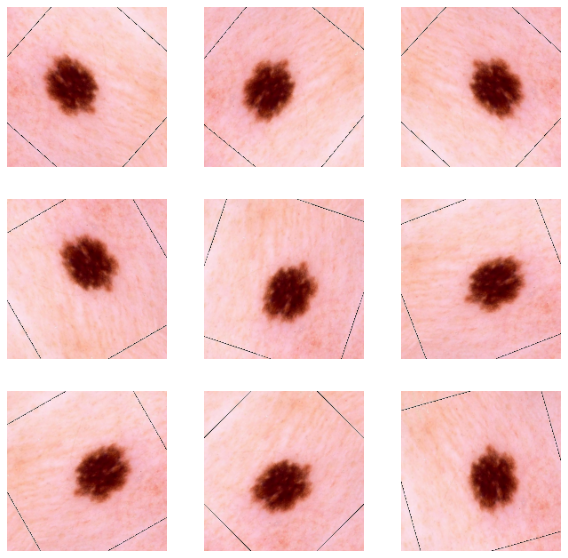

In [16]:
# Todo, visualize how your augmentation strategy works for one instance of training image.

plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1):
  for i in range(9):
      ax = plt.subplot(3, 3, i+1)
      image = tf.expand_dims(images[0].numpy().astype("uint8"), 0)
      augmented_image = data_augmentation(image)
      plt.imshow(np.array(augmented_image[0],np.int32))
      plt.axis("off")

### Todo:
### Create the model, compile and train the model


In [17]:
## You can use Dropout layer if there is an evidence of overfitting in your findings

num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.Dropout(.2),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

### Compiling the model

In [18]:
## Your code goes here
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

### Training the model

In [19]:
## Your code goes here, note: train your model for 20 epochs

epochs=20

history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/20
56/56 [==============================] - 25s 446ms/step - loss: 2.0912 - accuracy: 0.2087 - val_loss: 1.9505 - val_accuracy: 0.2685
Epoch 2/20
56/56 [==============================] - 17s 312ms/step - loss: 1.8015 - accuracy: 0.3560 - val_loss: 1.6640 - val_accuracy: 0.4251
Epoch 3/20
56/56 [==============================] - 17s 312ms/step - loss: 1.5842 - accuracy: 0.4431 - val_loss: 1.6003 - val_accuracy: 0.3960
Epoch 4/20
56/56 [==============================] - 17s 311ms/step - loss: 1.4771 - accuracy: 0.4710 - val_loss: 1.4296 - val_accuracy: 0.5078
Epoch 5/20
56/56 [==============================] - 17s 309ms/step - loss: 1.3831 - accuracy: 0.5095 - val_loss: 1.4180 - val_accuracy: 0.5235
Epoch 6/20
56/56 [==============================] - 18s 313ms/step - loss: 1.3812 - accuracy: 0.5095 - val_loss: 1.4814 - val_accuracy: 0.4787
Epoch 7/20
56/56 [==============================] - 18s 313ms/step - loss: 1.3494 - accuracy: 0.5179 - val_loss: 1.4034 - val_accuracy: 0.5078

### Visualizing the results

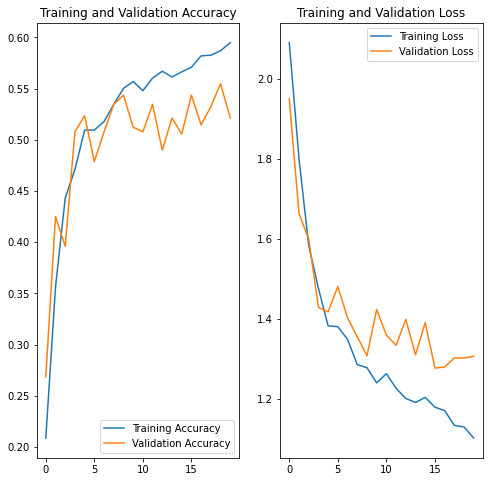

In [20]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### Todo: Write your findings after the model fit, see if there is an evidence of model overfit or underfit. Do you think there is some improvement now as compared to the previous model run?

After data augmentation, difference between the training accuracy & the test accuracy not much. So, `no overfitting` is there.
But, the training accuracy is quite low, which shows the model is an `underfit`. 

#### **Todo:** Find the distribution of classes in the training dataset.
#### **Context:** Many times real life datasets can have class imbalance, one class can have proportionately higher number of samples compared to the others. Class imbalance can have a detrimental effect on the final model quality. Hence as a sanity check it becomes important to check what is the distribution of classes in the data.

In [21]:
class_count = {class_name:len(os.listdir(os.path.join(data_dir_train, class_name))) 
               for class_name in os.listdir(data_dir_train)}

In [22]:
class_count_df = pd.DataFrame.from_dict(class_count, orient='index').reset_index()
class_count_df.columns = ['class', 'count']
class_count_df

,class,count
0,actinic keratosis,114
1,basal cell carcinoma,376
2,dermatofibroma,95
3,melanoma,438
4,nevus,357
5,pigmented benign keratosis,462
6,seborrheic keratosis,77
7,squamous cell carcinoma,181
8,vascular lesion,139


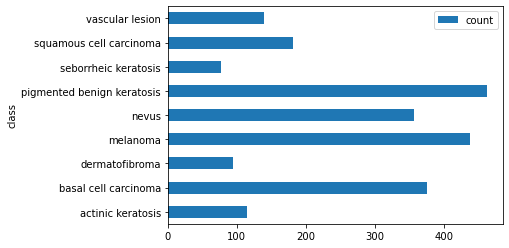

In [23]:
class_count_df.plot.barh(x='class', y='count')
plt.show()

#### **Todo:** Write your findings here: 

There is clearly class imbalance in the data.

#### - Which class has the least number of samples?

seborrheic keratosis


#### - Which classes dominate the data in terms proportionate number of samples?

pigmented benign keratosis

#### **Todo:** Rectify the class imbalance
#### **Context:** You can use a python package known as `Augmentor` (https://augmentor.readthedocs.io/en/master/) to add more samples across all classes so that none of the classes have very few samples.

In [ ]:
# !pip install Augmentor

To use `Augmentor`, the following general procedure is followed:

1. Instantiate a `Pipeline` object pointing to a directory containing your initial image data set.<br>
2. Define a number of operations to perform on this data set using your `Pipeline` object.<br>
3. Execute these operations by calling the `Pipeline’s` `sample()` method.


In [24]:
path_to_training_dataset='Dataset/Train/'
import Augmentor
for i in class_names:
    p = Augmentor.Pipeline(path_to_training_dataset + i)
    p.rotate(probability=0.7, max_left_rotation=10, max_right_rotation=10)
    p.sample(500) ## We are adding 500 samples per class to make sure that none of the classes are sparse.

Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 114 image(s) found.
Output directory set to Dataset/Train/actinic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F70C00E3FD0>: 100%|██████████| 500/500 [00:02<00:00, 244.93 Samples/s]
Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F70C003F6D0>:   1%|          | 6/500 [00:00<01:03,  7.75 Samples/s]

Initialised with 376 image(s) found.
Output directory set to Dataset/Train/basal cell carcinoma/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=600x450 at 0x7F70E0550EB0>: 100%|██████████| 500/500 [00:01<00:00, 283.73 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70E02F3E80>:   1%|          | 5/500 [00:00<01:13,  6.71 Samples/s]                  

Initialised with 95 image(s) found.
Output directory set to Dataset/Train/dermatofibroma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70C01424C0>: 100%|██████████| 500/500 [00:01<00:00, 270.92 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 438 image(s) found.
Output directory set to Dataset/Train/melanoma/output.

Processing <PIL.Image.Image image mode=RGB size=2592x1944 at 0x7F714C4A3CD0>: 100%|██████████| 500/500 [00:09<00:00, 51.03 Samples/s]                   
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 357 image(s) found.
Output directory set to Dataset/Train/nevus/output.

Processing <PIL.Image.Image image mode=RGB size=3072x2304 at 0x7F70E04CABE0>: 100%|██████████| 500/500 [00:08<00:00, 60.27 Samples/s]                   
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70A07381C0>:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 462 image(s) found.
Output directory set to Dataset/Train/pigmented benign keratosis/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70E02A5E80>: 100%|██████████| 500/500 [00:01<00:00, 272.19 Samples/s]                  
Executing Pipeline:   0%|          | 0/500 [00:00<?, ? Samples/s]

Initialised with 77 image(s) found.
Output directory set to Dataset/Train/seborrheic keratosis/output.

Processing <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=1024x768 at 0x7F70E0593CA0>: 100%|██████████| 500/500 [00:03<00:00, 134.41 Samples/s]
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70C00FEF70>:   1%|          | 3/500 [00:00<00:55,  8.89 Samples/s]                  

Initialised with 181 image(s) found.
Output directory set to Dataset/Train/squamous cell carcinoma/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F7114149F70>: 100%|██████████| 500/500 [00:01<00:00, 294.18 Samples/s]                  
Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70A072EF40>:   1%|▏         | 7/500 [00:00<00:32, 15.28 Samples/s]                  

Initialised with 139 image(s) found.
Output directory set to Dataset/Train/vascular lesion/output.

Processing <PIL.Image.Image image mode=RGB size=600x450 at 0x7F70E02A5820>: 100%|██████████| 500/500 [00:01<00:00, 283.05 Samples/s]                  


Augmentor has stored the augmented images in the output sub-directory of each of the sub-directories of skin cancer types.. Lets take a look at total count of augmented images.

In [25]:
image_count_train = len(list(data_dir_train.glob('*/output/*.jpg')))
print(image_count_train)

4500


### Lets see the distribution of augmented data after adding new images to the original training data.

In [26]:
path_to_training_dataset='Dataset/Train/'

In [27]:
for i in os.listdir(path_to_training_dataset):
    
    class_path = os.path.join(path_to_training_dataset, i)
    output_path = os.path.join(class_path, 'output')
    
    for aug_img in os.listdir(output_path):
        os.rename(os.path.join(output_path, aug_img), os.path.join(class_path, aug_img))

In [28]:
class_count = {class_name:len(os.listdir(os.path.join(data_dir_train, class_name))) 
               for class_name in os.listdir(data_dir_train)}

In [29]:
class_count_df = pd.DataFrame.from_dict(class_count, orient='index').reset_index()
class_count_df.columns = ['class', 'count']
class_count_df

,class,count
0,actinic keratosis,615
1,basal cell carcinoma,877
2,dermatofibroma,596
3,melanoma,939
4,nevus,858
5,pigmented benign keratosis,963
6,seborrheic keratosis,578
7,squamous cell carcinoma,682
8,vascular lesion,640


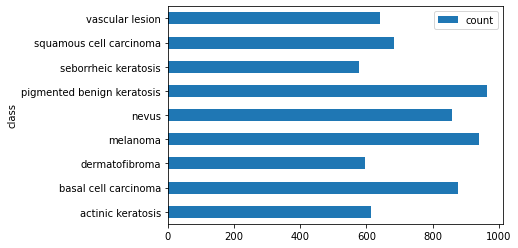

In [30]:
class_count_df.plot.barh(x='class', y='count')
plt.show()

So, now we have added 500 images to all the classes to maintain some class balance. We can add more images as we want to improve training process.

#### **Todo**: Train the model on the data created using Augmentor

In [31]:
batch_size = 32
img_height = 180
img_width = 180

#### **Todo:** Create a training dataset

In [32]:
data_dir_train=path_to_training_dataset
train_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'training',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 5392 files for training.


#### **Todo:** Create a validation dataset

In [33]:
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
  data_dir_train,
  seed=123,
  validation_split = 0.2,
  subset = 'validation',
  image_size=(img_height, img_width),
  batch_size=batch_size)

Found 6739 files belonging to 9 classes.
Using 1347 files for validation.


#### **Todo:** Create your model (make sure to include normalization)

In [34]:
## your code goes here
num_classes = len(class_names)

model = tf.keras.Sequential([
  layers.experimental.preprocessing.Rescaling(1./255),
  data_augmentation,
  layers.Conv2D(16, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(32, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(64, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(128, activation='relu'),
  layers.Dense(num_classes)
])

#### **Todo:** Compile your model (Choose optimizer and loss function appropriately)

In [35]:
## your code goes here
model.compile(optimizer='adam',
              loss=tf.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#### **Todo:**  Train your model

In [36]:
epochs = 50

## Your code goes here, use 50 epochs.
history = model.fit(
  train_ds,
  validation_data=val_ds,
  epochs=epochs
)

Epoch 1/50
169/169 [==============================] - 124s 732ms/step - loss: 1.9449 - accuracy: 0.2450 - val_loss: 1.5662 - val_accuracy: 0.3756
Epoch 2/50
169/169 [==============================] - 126s 744ms/step - loss: 1.5248 - accuracy: 0.4076 - val_loss: 1.4308 - val_accuracy: 0.4395
Epoch 3/50
169/169 [==============================] - 126s 745ms/step - loss: 1.4181 - accuracy: 0.4575 - val_loss: 1.4100 - val_accuracy: 0.4625
Epoch 4/50
169/169 [==============================] - 126s 744ms/step - loss: 1.3741 - accuracy: 0.4698 - val_loss: 1.3040 - val_accuracy: 0.5078
Epoch 5/50
169/169 [==============================] - 131s 773ms/step - loss: 1.2906 - accuracy: 0.4991 - val_loss: 1.2725 - val_accuracy: 0.5108
Epoch 6/50
169/169 [==============================] - 131s 773ms/step - loss: 1.2524 - accuracy: 0.5193 - val_loss: 1.2869 - val_accuracy: 0.4892
Epoch 7/50
169/169 [==============================] - 125s 740ms/step - loss: 1.2498 - accuracy: 0.5252 - val_loss: 1.1675 -

#### **Todo:**  Visualize the model results

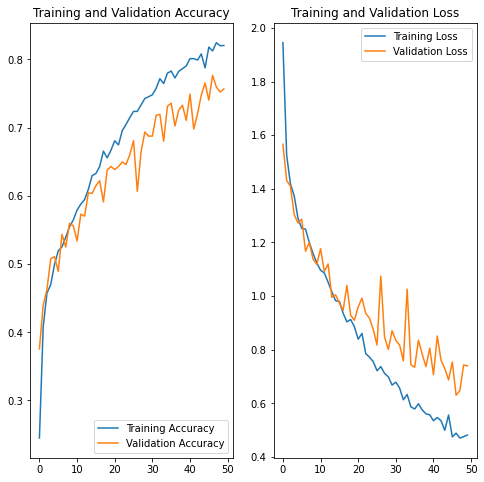

In [37]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

#### **Todo:**  Analyze your results here. Did you get rid of underfitting/overfitting? Did class rebalance help?



We get `82%` train accuracy & `74%` validation accuracy

We can see now both `overfitting` & `underfitting` problem has been taken cared.

`Class Rebalance` has improved the accuracy of the model.